In [77]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [65]:
dataset = pd.read_csv('./hexagon.csv')
x = np.asarray(dataset.iloc[:,[0,1]])
x.shape

(600, 2)

In [72]:
x = np.asarray(pd.DataFrame([[3, 5, 7], [0, 1, 10], [0, 4, -4]]))

In [73]:
np.argmin([np.linalg.norm([0, 0, 0] - neuron) for neuron in x])

2

In [55]:
np.min(np.min(x))

0

In [24]:
a = np.random.permutation(3)

In [41]:
x = np.array([3, 1])
y = np.array([0, 5])
np.linalg.norm(x - y)

5.0

In [32]:
np.exp(-2/3)

0.513417119032592

In [47]:
np.random.uniform(1, 5, size=(6,x.shape[1]))

array([[2.45403384, 2.62983657, 1.59131731],
       [1.61890427, 4.49603288, 4.95214673],
       [2.50487622, 2.18571837, 2.28400076],
       [2.55001601, 1.41012928, 3.49866568],
       [4.46858408, 3.72242082, 3.19653605],
       [2.0043767 , 3.33929193, 4.58735093]])

In [75]:
#funkcje sasiedztwa 

def gauss(x, t):
    return np.exp(-(t*x)**2)

def mexican_hat(x, t):
    return (2 - 4*(x*t)**2)*np.exp(-(x*t)**2)

In [148]:
class kohonen:
    def __init__(self, N, M, data, width, theta = gauss):
        self.N = N #wymiary sieci
        self.M = M
        self.data = data #zbior danych
        self.neurons = np.random.uniform(np.min(data), np.max(data), size=(M*N, data.shape[1])) #inicjowanie wag pokrywających zbiór data
        self.width = width #szerokosc sasiedztwa
        self.theta = theta #funkcja sąsiedztwa
        self.iter = 0 #odbyte iteracje uczenia, pamiętanie iteracji
        
    def dist(self, x, y):
        return self.width*math.sqrt((x%self.N - y%self.N)**2 + (math.floor(x/self.N) - math.floor(y/self.N))**2)
    
    def alpha(self, t, lambda_):
        return np.exp(-t/lambda_)
    
    def train(self, lambda_):
        
        for t in range(lambda_):
            perm = np.random.permutation(self.data.shape[0])
            for x in self.data[perm]:
                closest_neuron_index = np.argmin([np.linalg.norm(x - neuron) for neuron in self.neurons])
                for i, neuron in enumerate(self.neurons):
                    self.neurons[i] += self.theta(self.dist(closest_neuron_index, i), self.iter + t)*self.alpha(self.iter + t, self.iter + lambda_)*(x - neuron)
        self.iter += lambda_
    

    def classification(self):
        return [np.argmin([np.linalg.norm(neuron - x) for neuron in self.neurons]) for x in self.data]
    
    
    def limit_neurons(self, n):
        while (len(self.neurons) > n):
            distance = np.array([np.linalg.norm(i-j) for i in self.neurons for j in self.neurons])
            #print(distance)
            distance = distance[distance!=0]
            #print(distance)
            #distance = distance.reshape(len(self.neurons),len(self.neurons)-1)
            #print(distance)
            index = np.unravel_index(distance.argmin(), (len(self.neurons),len(self.neurons)-1))[0]
            #print(distance.argmin())
            #print(distance.shape)
            #print(index)
            self.neurons = np.delete(self.neurons,index,0)
            
    def limit_neurons2(self, n):
        while (len(self.neurons) > n):
            distance = np.array([np.linalg.norm(i-j) for i in self.neurons for j in self.neurons])
            distance = distance[distance!=0]
            distance = distance.reshape(len(self.neurons),len(self.neurons)-1)
            index = np.unravel_index(distance.argmin(), distance.shape)[0]
            self.neurons = np.delete(self.neurons,index,0)

In [119]:
dataset = pd.read_csv('./hexagon.csv')
x = np.asarray(dataset.iloc[:,[0,1]])
x.shape

(600, 2)

In [149]:
nn = kohonen(4, 4, x, 1)

In [150]:
nn.train(100)

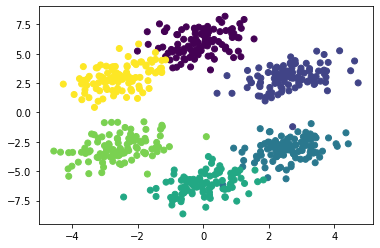

In [151]:
plt.scatter(dataset['x'], dataset['y'], c=dataset['c'])

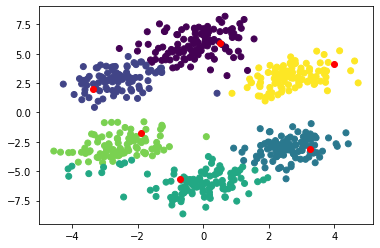

In [152]:
nn.limit_neurons(6)
c = nn.classification()
plt.scatter(dataset['x'], dataset['y'], c=c)
plt.scatter(nn.neurons[:,0],nn.neurons[:,1], color = "red")

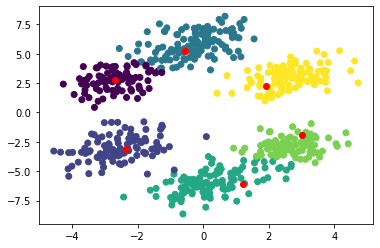

In [153]:
nn = kohonen(4, 4, x, 1)
nn.train(100)
nn.limit_neurons2(6)
c = nn.classification()
plt.scatter(dataset['x'], dataset['y'], c=c)
plt.scatter(nn.neurons[:,0],nn.neurons[:,1], color = "red")

In [122]:
nn = kohonen(2, 2, x, 1)
nn.train(100)
nn.limit_neurons(3)

[0.         7.19740004 8.80663578 3.3084988  7.19740004 0.
 3.79754073 8.45300094 8.80663578 3.79754073 0.         8.60182205
 3.3084988  8.45300094 8.60182205 0.        ]
[7.19740004 8.80663578 3.3084988  7.19740004 3.79754073 8.45300094
 8.80663578 3.79754073 8.60182205 3.3084988  8.45300094 8.60182205]
[[7.19740004 8.80663578 3.3084988 ]
 [7.19740004 3.79754073 8.45300094]
 [8.80663578 3.79754073 8.60182205]
 [3.3084988  8.45300094 8.60182205]]
2
(4, 3)
0


In [113]:
 def limit_neurons(self, n):
        while (len(self.neurons) > n):
            distance = np.array([np.linalg.norm(i-j) for i in self.neurons for j in self.neurons])
            distance = distance[distance!=0]
            distance = distance.reshape(len(self.neurons),len(self.neurons)-1)
            index = np.unravel_index(distance.argmin(), distance.shape)[0]
            self.neurons = np.delete(self.neurons,index,0)

In [125]:
a = np.array([[7.19740004, 8.80663578, 3.3084988 ],
 [7.19740004, 3.79754073, 8.45300094],
 [8.80663578, 3.79754073, 8.60182205],
 [3.3084988,  8.45300094, 8.60182205]])

In [126]:
a.argmin()

2

In [127]:
a[2]

array([8.80663578, 3.79754073, 8.60182205])

In [132]:
sum(a[3])

20.36332179